# Perceptron classifier

In [1]:
from sklearn.metrics import accuracy_score

from data.mnist_seven import MNISTSeven
from model.stupid_recognizer import StupidRecognizer
from model.perceptron import Perceptron
from report.evaluator import Evaluator

data = MNISTSeven("../data/mnist_seven.csv", 3000, 1000, 1000)

def evaluate_perceptron(learning_rate, num_epochs):
    myPerceptronClassifier = Perceptron(data.trainingSet,
                                        data.validationSet,
                                        data.testSet,
                                        learningRate=learning_rate,
                                        epochs=num_epochs)
    myPerceptronClassifier.train()
    perceptronPred = myPerceptronClassifier.evaluate()
    accuracy = accuracy_score(data.testSet.label, perceptronPred)*100
    return accuracy

Loading data from ../data/mnist_seven.csv...
Data loaded.


## Learning rate

The figure below shows the achieved accuracy depending on the number of epochs for different learning rates.

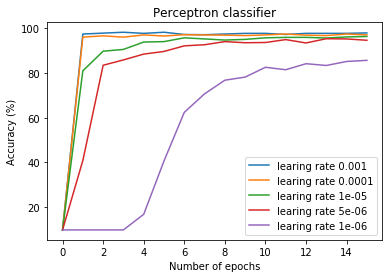

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

a_values = (0.001, 0.0001, 0.00001, 0.000005, 0.000001)
x = list(range(16))
for a in a_values:
    y = [evaluate_perceptron(a, xi) for xi in x]
    plt.plot(x, y, label="learing rate {}".format(a))
plt.legend()
plt.title("Perceptron classifier")
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy (%)')
plt.show()

## Weight vector

The image below shows a visual representation of the weight vector of the classifier after it has been trained. 

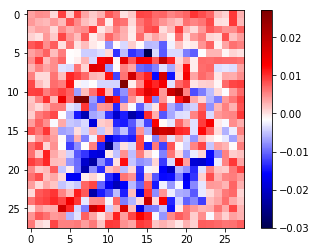

In [3]:
import numpy as np
myPerceptronClassifier = Perceptron(data.trainingSet,
                                        data.validationSet,
                                        data.testSet,
                                        learningRate=0.001,
                                        epochs=20)
myPerceptronClassifier.train()

im = np.reshape(myPerceptronClassifier.weight, (-1, 28))

import matplotlib.pyplot as plt

plt.imshow(im, cmap='seismic')
plt.colorbar()

plt.show()

## Evaluation

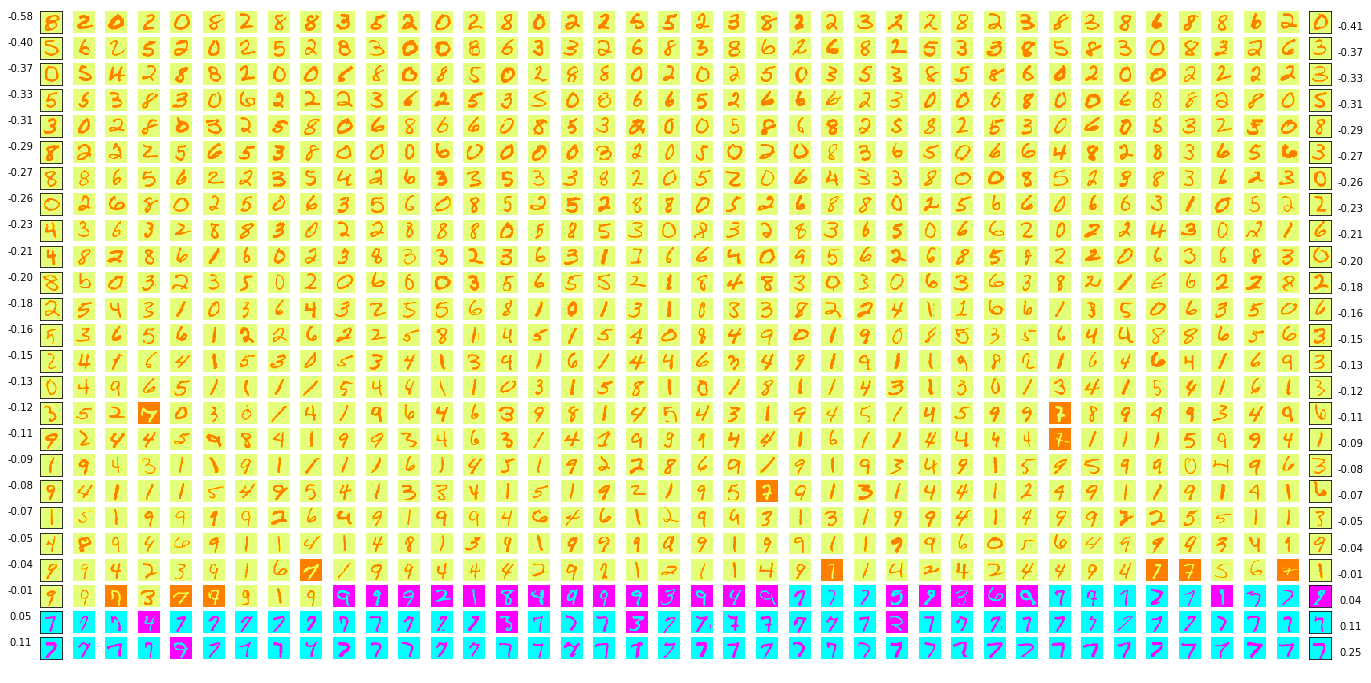

In [9]:
# %matplotlib

results = myPerceptronClassifier.evaluate()
weights = myPerceptronClassifier.weight
all_data = []
for i in range(len(data.testSet.label)):
    label = data.testSet.label[i]
    _input = data.testSet.input[i]
    value = np.dot(_input, weights)
    all_data.append([value, results[i]==label, _input])

fig = plt.figure(figsize=(20, 10))
all_data.sort(key=lambda x:x[0])

plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)

start = 0
for i in range(1000):
    value, correct, im = all_data[i]
    if not correct:
        im = 1-im
    ax = fig.add_subplot(25, 40, i+1)
    if i%40 == 0:
        ax.set_ylabel("{:.2f}".format(value), rotation=0, labelpad=20)
        ax.xaxis.set_major_locator(plt.NullLocator())
        ax.yaxis.set_major_locator(plt.NullLocator())
    elif i%40 == 39:
        ax.yaxis.set_label_position("right")
        ax.set_ylabel("{:.2f}".format(value), rotation=0, labelpad=20)
        ax.xaxis.set_major_locator(plt.NullLocator())
        ax.yaxis.set_major_locator(plt.NullLocator())
    else:
        ax.axis('off')
    # ax.set_title("{:.2f}".format(value)){:.2f}".format(value))
    im = np.reshape(im, (-1, 28))
    if value >=0:
        ax.imshow(im, cmap='cool')
    else:
        ax.imshow(im, cmap='Wistia')
plt.show()